0.15865525393145707


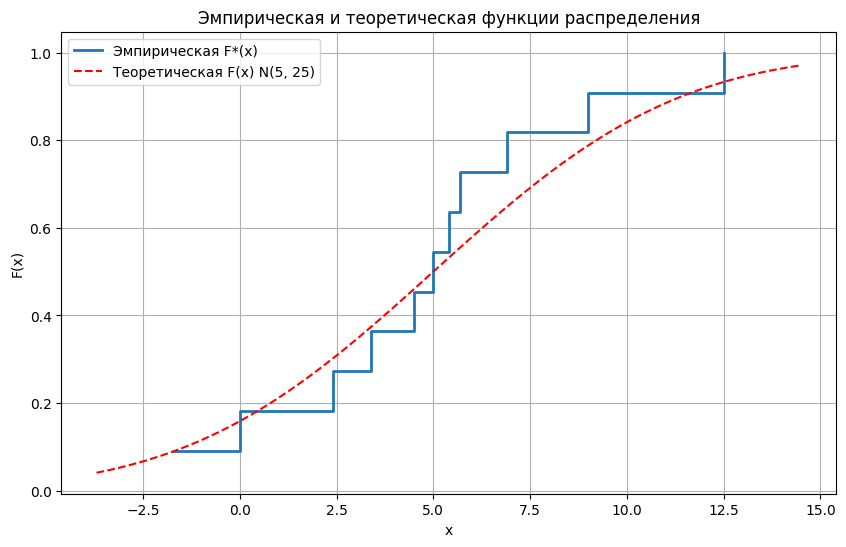

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Данные
data = [0, 9, 2.4, -1.7, 5, 5.4, 3.4, 5.7, 12.5, 4.5, 6.9]
data_sorted = np.sort(data)
n = len(data)

# Эмпирическая функция (ECDF)
y_emp = np.arange(1, n + 1) / n

# Теоретическая функция (CDF) для N(5, 5^2)
x_theor = np.linspace(min(data)-2, max(data)+2, 100)
y_theor = norm.cdf(x_theor, loc=5, scale=5)
print(norm.cdf(0, 5, 5))
# Построение
plt.figure(figsize=(10, 6))
plt.step(data_sorted, y_emp, where='post', label='Эмпирическая F*(x)', linewidth=2)
plt.plot(x_theor, y_theor, 'r--', label='Теоретическая F(x) N(5, 25)')
plt.title('Эмпирическая и теоретическая функции распределения')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.grid(True)
plt.legend()
plt.show()

Выборочное среднее: 10.8100
Выборочная дисперсия: 6.1139
СКО: 2.4726
Normal (MM/MLE): a=10.81, sigma=2.47
Uniform (MM): a=6.53, b=15.09
Uniform (MLE): a=5, b=17


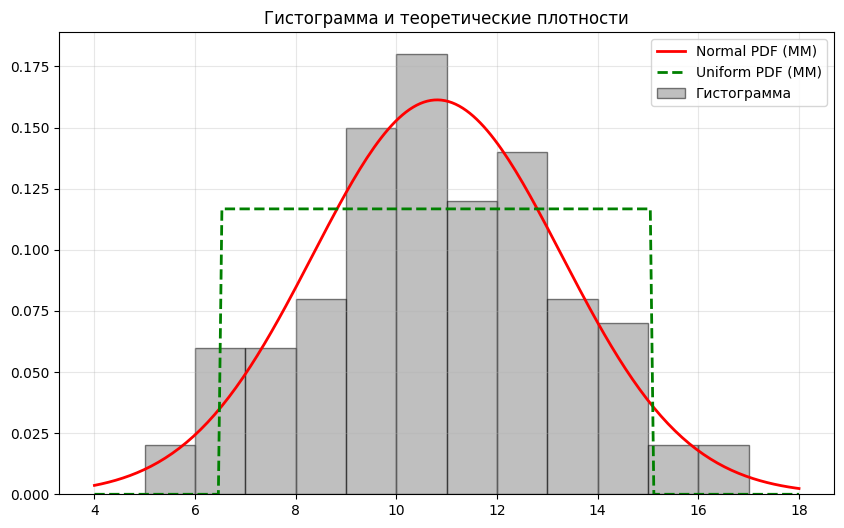

n'0 = 1.6475970717988417
n'1 = 3.580467297889236
n'2 = 6.621158355413452
n'3 = 10.419412026865787
n'4 = 13.953220602535376
n'5 = 15.90128775350233
n'6 = 15.421221682079278
n'7 = 12.72721636736992
n'8 = 8.938676442468873
n'9 = 5.34235360006583
n'10 = 2.7170880614045823
n'11 = 1.1759156939754822

--- Результаты теста Хи-квадрат ---
Критическое значение (alpha=0.05, k=9): 16.9190
Normal Chi2: 4.9520 ->Принимаем
Uniform Chi2: 38.0000 ->Отвергаем


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform, chi2

# Данные
n = 100
n_i = np.array([2, 6, 6, 8, 15, 18, 12, 14, 8, 7, 2, 2])
intervals = np.arange(5, 18)  # 5, 6, ..., 17
midpoints = intervals[:-1] + 0.5  # 5.5, ..., 16.5
h = 1

# 1. Выборочные характеристики
mean_x = np.sum(n_i * midpoints) / n
var_x = np.sum(n_i * (midpoints - mean_x)**2) / n
std_x = np.sqrt(var_x)

print(f"Выборочное среднее: {mean_x:.4f}")
print(f"Выборочная дисперсия: {var_x:.4f}")
print(f"СКО: {std_x:.4f}")

# 2. Оценки параметров
# Нормальное (MM и MLE совпадают)
mu_est, sigma_est = mean_x, std_x

# Равномерное (MM)
b_mm = mean_x + np.sqrt(3 * var_x)
a_mm = mean_x - np.sqrt(3 * var_x)

# Равномерное (MLE для сгруппированных - границы диапазона)
a_mle, b_mle = 5, 17

print(f"Normal (MM/MLE): a={mu_est:.2f}, sigma={sigma_est:.2f}")
print(f"Uniform (MM): a={a_mm:.2f}, b={b_mm:.2f}")
print(f"Uniform (MLE): a={a_mle}, b={b_mle}")

# 3. Графики
x_plot = np.linspace(4, 18, 200)

plt.figure(figsize=(10, 6))

# Гистограмма (density=True нормирует, чтобы площадь была 1)
plt.bar(midpoints, n_i / (n*h), width=h, alpha=0.5, color='gray',
        edgecolor='black', label='Гистограмма')

# Плотность нормального (MM)
pdf_norm = norm.pdf(x_plot, loc=mu_est, scale=sigma_est)
plt.plot(x_plot, pdf_norm, 'r-', linewidth=2, label='Normal PDF (MM)')

# Плотность равномерного (MM)
pdf_unif_mm = uniform.pdf(x_plot, loc=a_mm, scale=b_mm-a_mm)
plt.plot(x_plot, pdf_unif_mm, 'g--', linewidth=2, label='Uniform PDF (MM)')

plt.title('Гистограмма и теоретические плотности')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


# 4. Критерий Хи-квадрат
def get_chi2_norm(n_obs, boundaries, mu, sigma, n_total):
    expected = []
    for i in range(len(boundaries)-1):
        p = norm.cdf(boundaries[i+1], mu, sigma) - norm.cdf(boundaries[i], mu,
                                                            sigma)
        print(f"n\'{i} = {p*n_total}")
        expected.append(p * n_total)
    expected = np.array(expected)
    # Коррекция для крайних интервалов (чтобы сумма p была 1)
    # В строгом решении надо брать (-inf, 6] и [16, +inf), но здесь оставим как
    # есть для наглядности
    chi2_val = np.sum((n_obs - expected)**2 / expected)
    return chi2_val, expected


def get_chi2_unif(n_obs, boundaries, a, b, n_total):
    prob = 1.0 / (b - a)
    expected = np.full(len(n_obs), prob * n_total)  # 8.33...
    chi2_val = np.sum((n_obs - expected)**2 / expected)
    return chi2_val


# Расчет
chi2_norm_stat, exp_norm = get_chi2_norm(n_i, intervals, mu_est, sigma_est, n)
# Используем границы гистограммы для теста
chi2_unif_stat = get_chi2_unif(n_i, intervals, 5, 17, n)
df = len(n_i) - 1 - 2  # k = 12 - 1 - 2 = 9
crit_val = chi2.ppf(0.95, df)
print("\n--- Результаты теста Хи-квадрат ---")
print(f"Критическое значение (alpha=0.05, k={df}): {crit_val:.4f}")
print(f"Normal Chi2: {chi2_norm_stat:.4f} ->"
      f"{'Принимаем' if chi2_norm_stat < crit_val else 'Отвергаем'}")
print(f"Uniform Chi2: {chi2_unif_stat:.4f} ->"
      f"{'Принимаем' if chi2_unif_stat < crit_val else 'Отвергаем'}")